In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load Netflix dataset
df = pd.read_csv("netflix_titles.csv")

# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.shape

(8807, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [19]:
#This tells you where data is missing (e.g., some movies don’t have director names, some rows don’t have country).
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
#Check for duplicate rows:
df.duplicated().sum()

0

In [ ]:
#As  the result is not more than 0, so we dont have to remove any duplicates..

In [25]:
#Convert date_added to Date Format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [27]:
df['date_added'].head(10)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-09-24
8   2021-09-24
9   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [31]:
#extracting year from date
df['year_added'] = df['date_added'].dt.year

In [45]:
#handling Missing value
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         3
listed_in        0
description      0
year_added      98
dtype: int64

In [37]:
df['country'] = df['country'].fillna("Unknown")

In [39]:
df['director'] = df['director'].fillna("Unknown")

In [41]:
df['cast'] = df['cast'].fillna("Not Available")

In [43]:
df['rating'] = df['rating'].fillna("Not Rated")

In [47]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         3
listed_in        0
description      0
year_added      98
dtype: int64

In [56]:
#ANALYSIS
#1. Movies vs TV Shows Distribution
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

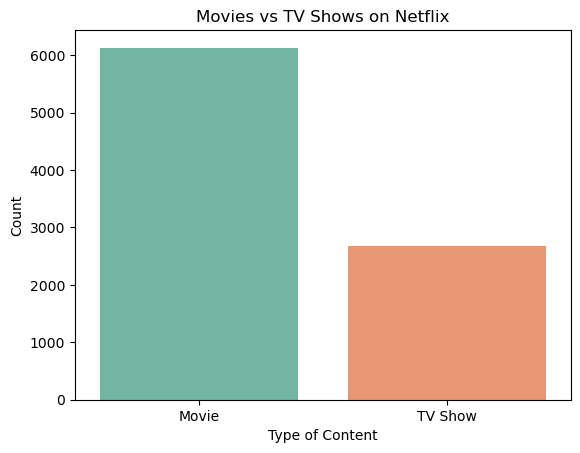

In [68]:
#visualization
sns.countplot(data=df, x='type', hue='type', palette="Set2", legend=False)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()


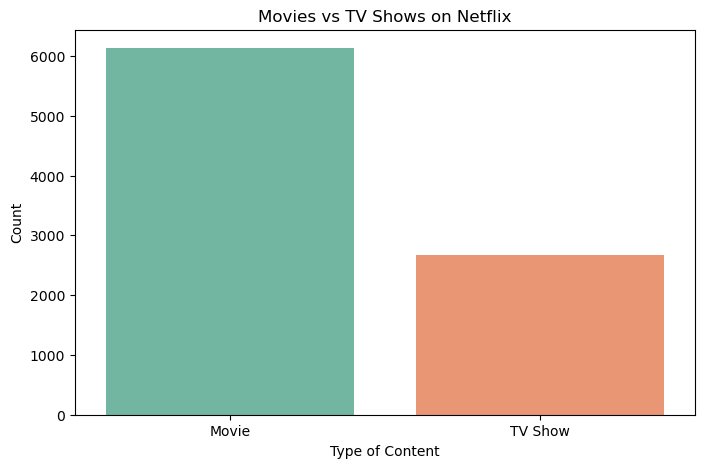

In [84]:
# 1. Movies vs TV Shows
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', hue='type', legend=False, palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.savefig("images/movies_vs_tv.png", dpi=150)
plt.show()

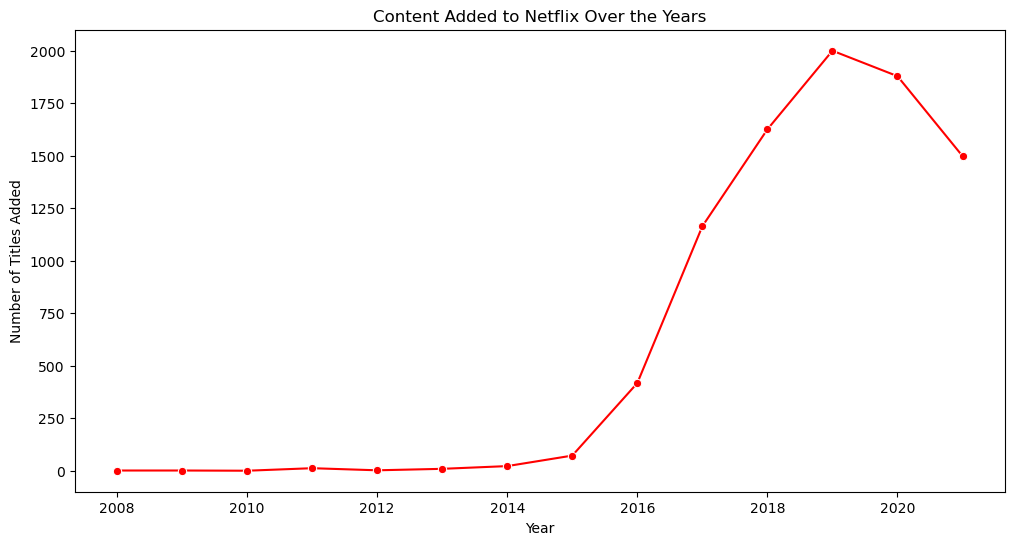

In [70]:
#2. Content Growth Over the Years
# Count of titles added per year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot growth
plt.figure(figsize=(12,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker="o", color="red")
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

#A line chart with years on the x-axis and number of titles on the y-axis.
#You’ll notice a big spike after 2015, showing how Netflix expanded rapidly worldwide

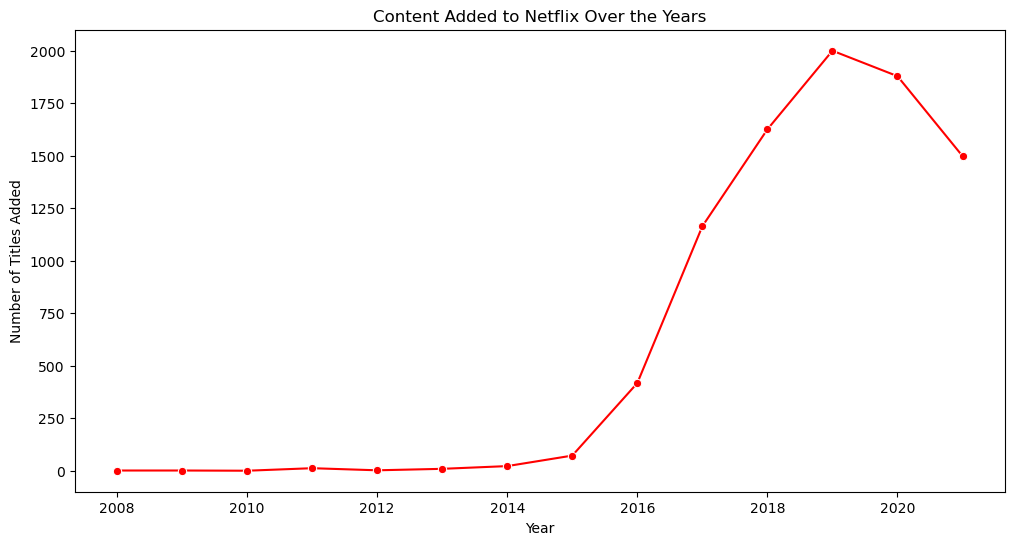

In [86]:
# 2. Content Growth Over Years
content_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker="o", color="red")
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.savefig("images/content_growth.png", dpi=150)
plt.show()

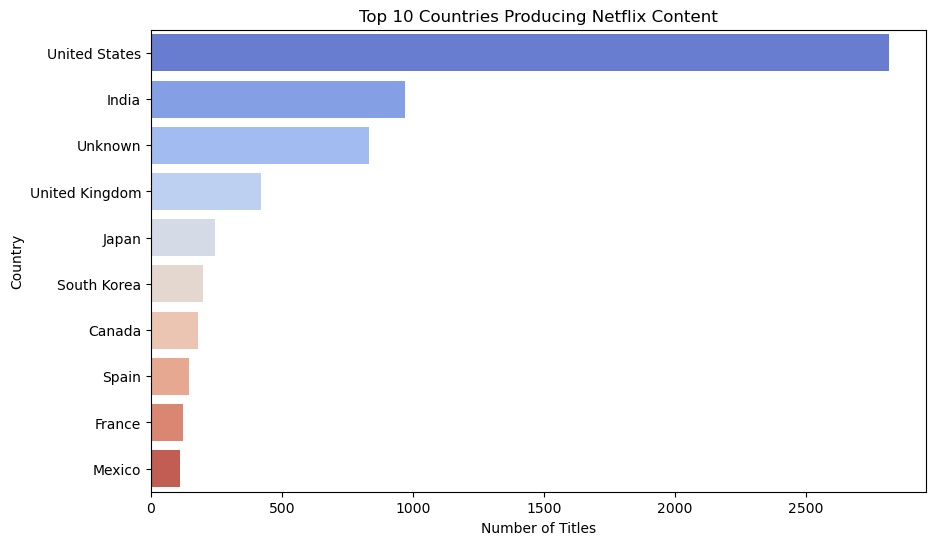

In [78]:
#3. Top 10 Countries Producing Netflix Content
# Top 10 countries
top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="coolwarm", legend=False)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

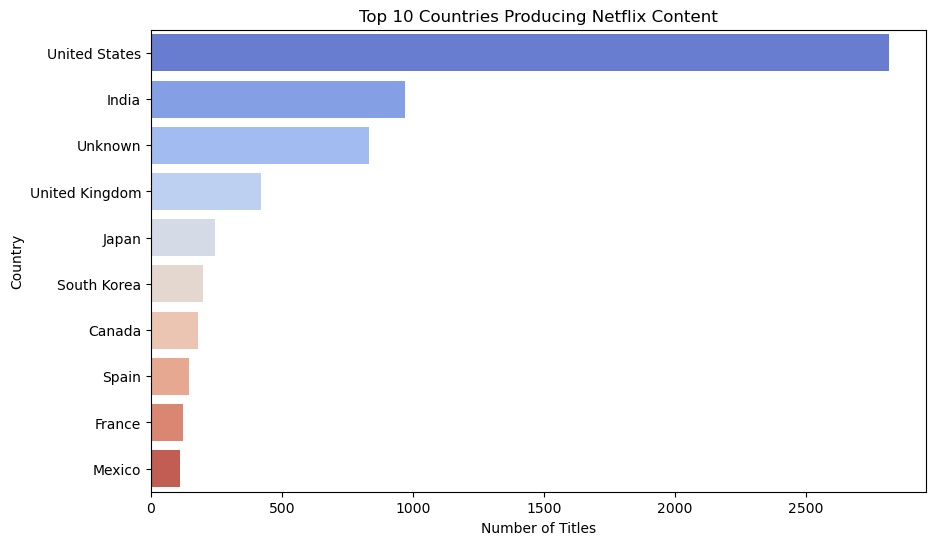

In [90]:
# 3. Top Countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries.index, palette="coolwarm", legend=False)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.savefig("images/top_countries.png", dpi=150)
plt.show()

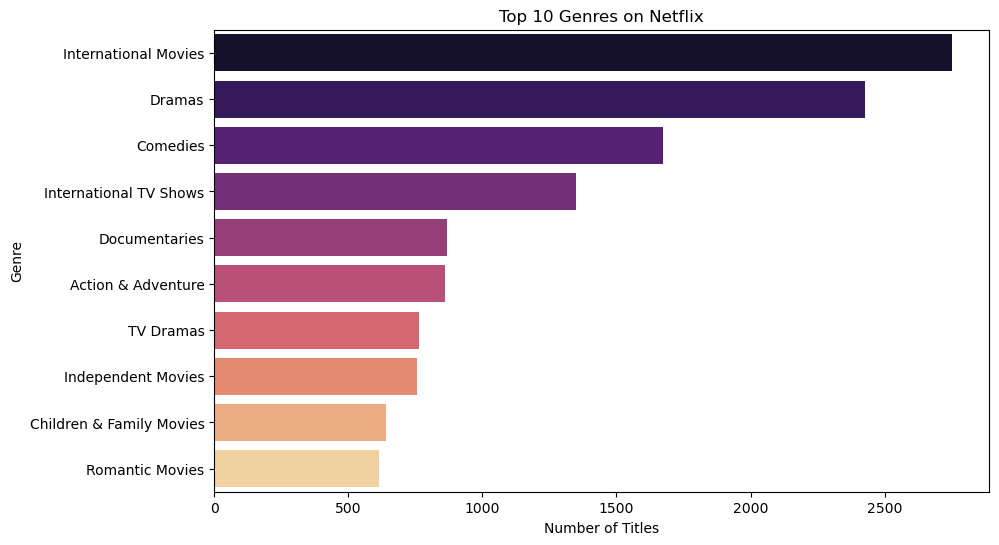

In [82]:
#4. Top 10 Genres on Netflix
from collections import Counter

# Create a list of all genres
genre_list = []
for genres in df['listed_in'].dropna():
    genre_list.extend(genres.split(', '))  # split by comma and space

# Count frequency of each genre
genre_count = Counter(genre_list)

# Convert to DataFrame for plotting top 10
genre_df = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Count', y='Genre', hue='Genre', palette="magma", legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

#Drama, Comedy, and International Movies  appear in the top 3.
#Shows which genres dominate Netflix’s catalog.

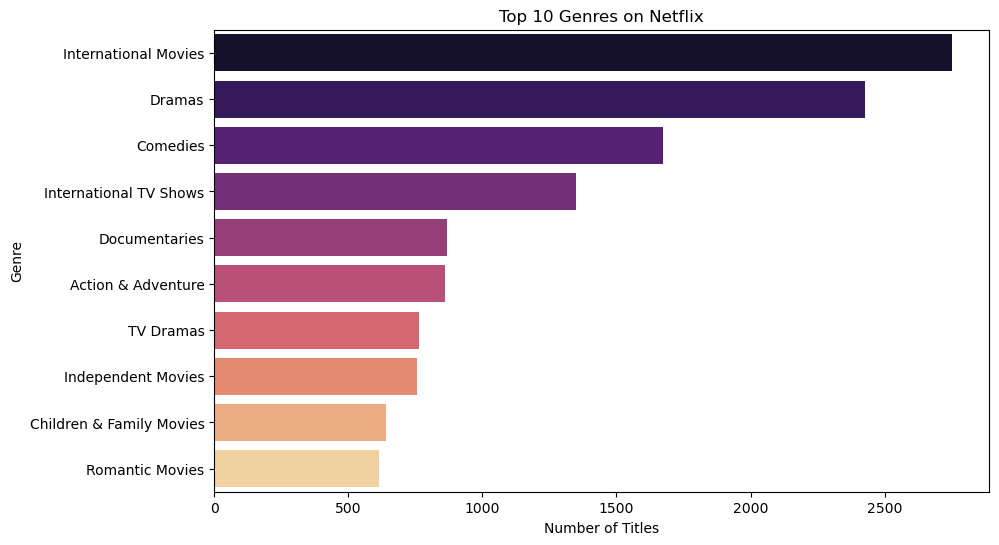

In [94]:
# 4. Top Genres
from collections import Counter
genre_list = []
for genres in df['listed_in'].dropna():
    genre_list.extend(genres.split(', '))
genre_count = Counter(genre_list)
genre_df = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Count', y='Genre', hue='Genre', palette="magma", legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.savefig("images/top_genres.png", dpi=150)
plt.show()